AnnData object with n_obs × n_vars = 36601 × 12012
AnnData object with n_obs × n_vars = 12012 × 36601
12012
36601
AnnData object with n_obs × n_vars = 12012 × 27080
    obs: 'n_genes'
    var: 'n_cells'
12012
27080
View of AnnData object with n_obs × n_vars = 12012 × 27080
    obs: 'n_genes'
    var: 'n_cells'


Trying to set attribute `.obs` of view, copying.


View of AnnData object with n_obs × n_vars = 12012 × 4335
    obs: 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


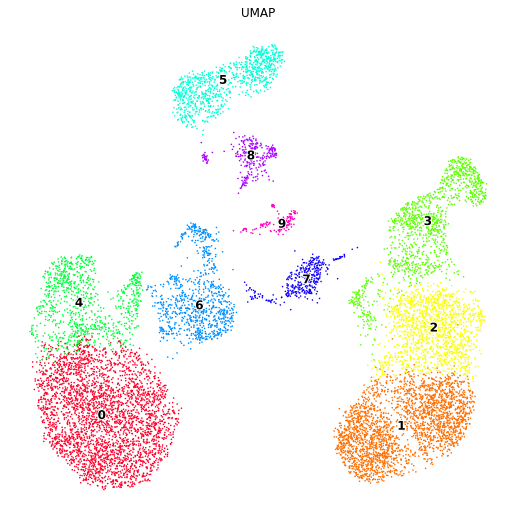

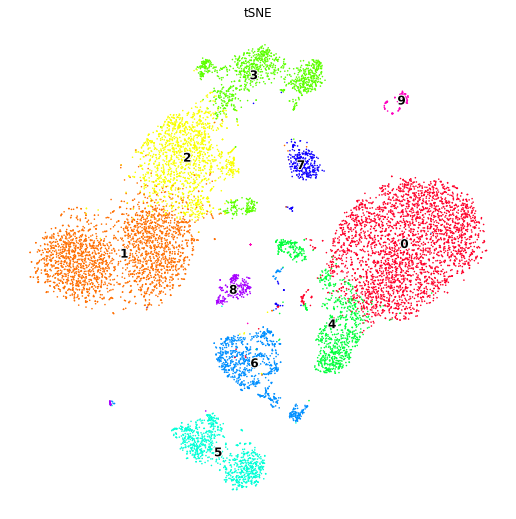

0 : 3139
1 : 2552
2 : 1482
3 : 1243
4 : 955
5 : 941
6 : 915
7 : 364
8 : 276
9 : 145
AnnData object with n_obs × n_vars = 5 × 12012
AnnData object with n_obs × n_vars = 12012 × 5


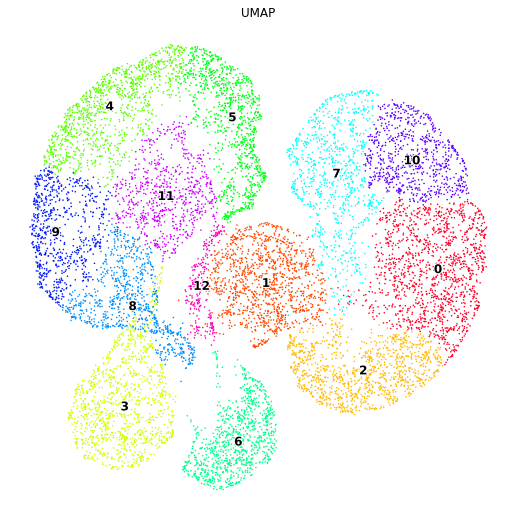

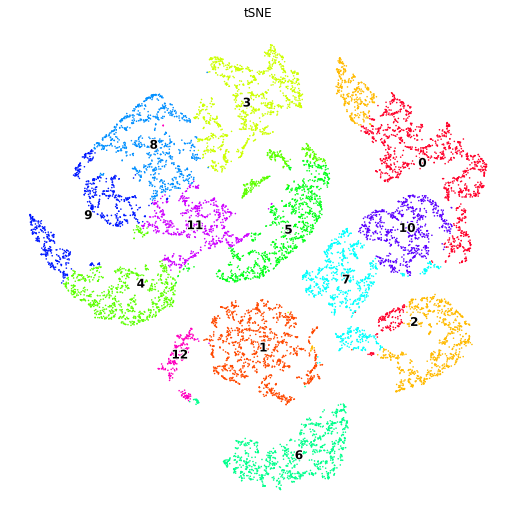

0 : 1345
1 : 1190
2 : 1129
3 : 1124
4 : 1108
5 : 1004
6 : 980
7 : 886
8 : 825
9 : 739
10 : 728
11 : 708
12 : 246
silhouette_avg:  0.46685874 0.3521436
RNA: 9
(7813, 4335) (6077, 19289)
4488
   res1  cls_r_raw  cls_r     sil_r  res2  cls_a_raw  cls_a     sil_a  \
0   0.3       10.0    7.0  0.466859  0.25       13.0    7.0  0.352144   

   len(RNA)  len(ATAC)  Overlap  
0    7813.0     6077.0   4488.0  
8759 2498
126950 19289
1 5
2 11
3 3
4 7
5 6
7 2
8 12
Line 166. >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 2021.5438303947449
lambda, lev, n_neigh, n_iter, FOSCTTM1, FOSCTTM2:  0.8 2 3 0 0.11761782626400652 0.10518323645097843
4488.0 4488.0
4488 4488
Final FOSCTTM XonY and YonX:  0.11761782626400652 0.10518323645097843


In [2]:
import sys
sys.path.insert(0, '/home/ejafari/alignment/Git/src/')
from utils import *
from AIscEA import *
from evals import *
from rmCls import *
from similarity import *
from collections import Counter
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')


res_df = pd.DataFrame(columns=['res1', 'cls_r_raw', 'cls_r', 'sil_r', 'res2', 'cls_a_raw', 'cls_a', 'sil_a', 'len(RNA)', 'len(ATAC)', 'Overlap'])
for res1 in [0.3]:
    for res2 in [0.25]:


        ############################ High_var = True ######################################
        input_dir = "/home/ejafari/alignment/downstream/data/PBMC_10k/mine/"
        # Find marker genes of scRNAseq data
        markers_rna, rna = scRNAseq_clustering_original(input_dir + 'rna.csv', filtering=True, resl=res1, highly_var=True, tr=True, n_pc=15)


        cls_r_raw = len(set(rna.obs['leiden']))
        
        # Find clusters of low dimensional cisTopic result for scATACseq
        atac = clustering(input_dir + 'atac_topics.tsv', transpose=True, resl=res2)


        ############################ scATAC ######################################
        # 1) Put cisTopic clusters and embedding values on the original data and 2) find marker genes and their logFC
        f_original = 'pred_matrix_closest_genes_1k_downstream_strand_first_prom.csv'
        markers_atac, atac_cis_on_org = process_cisTopic_on_orig(atac, f_original, input_dir, save=False, transpose=True)

        # To match name of the cells in RNA and ATAC data
        atac_cis_on_org.obs.index = [i.replace('.','-') for i in atac_cis_on_org.obs.index] 

#         atac_cis_on_org.obs.index = [ind[1:] for ind in atac_cis_on_org.obs.index]
#         atac.obs.index = [ind[1:] for ind in atac.obs.index]

        cls_a_raw = len(set(atac_cis_on_org.obs['leiden']))
        
        
        silhouette_avg_r = silhouette_score(rna.obsm['X_umap'], rna.obs['leiden'])
        silhouette_avg_a = silhouette_score(atac_cis_on_org.obsm['X_umap'], atac_cis_on_org.obs['leiden'])

        print("silhouette_avg: ", silhouette_avg_r, silhouette_avg_a)


        rna, atac_cis_on_org,  markers_rna, markers_atac = rm_tiny_cluster(rna, atac_cis_on_org,markers_rna, markers_atac, min_cells=200, rm_correspondence=False)

        col_ind, rna, atac_cis_on_org = extract_mapped_clusters(rna, markers_rna, atac_cis_on_org, markers_atac, p_val_count=6)

        try:
            print(rna.shape, atac_cis_on_org.shape)
            overlap = len(set(rna.obs.index) & set(atac_cis_on_org.obs.index))
            print(overlap)

            res_df.loc[len(res_df)] = [res1, cls_r_raw, len(set(rna.obs['leiden'])), silhouette_avg_r, res2, cls_a_raw, len(set(atac_cis_on_org.obs['leiden'])), silhouette_avg_a, rna.shape[0], atac_cis_on_org.shape[0], overlap]
        except:
            res_df.loc[len(res_df)] = [res1, res2,  None, None, None, None, None, None, None, None, 0]
            
            
#         res_df.to_csv('10k_loop_params_.csv', index=True)


print(res_df)

aligns_dict, fracs1_all, fracs2_all = AIscEA(col_ind, rna, markers_rna, atac_cis_on_org, markers_atac)    
        





# Umap plots

AnnData object with n_obs × n_vars = 36601 × 12012
AnnData object with n_obs × n_vars = 12012 × 36601
12012
36601
AnnData object with n_obs × n_vars = 12012 × 27080
    obs: 'n_genes'
    var: 'n_cells'
12012
27080
View of AnnData object with n_obs × n_vars = 12012 × 27080
    obs: 'n_genes'
    var: 'n_cells'


Trying to set attribute `.obs` of view, copying.


View of AnnData object with n_obs × n_vars = 12012 × 4335
    obs: 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


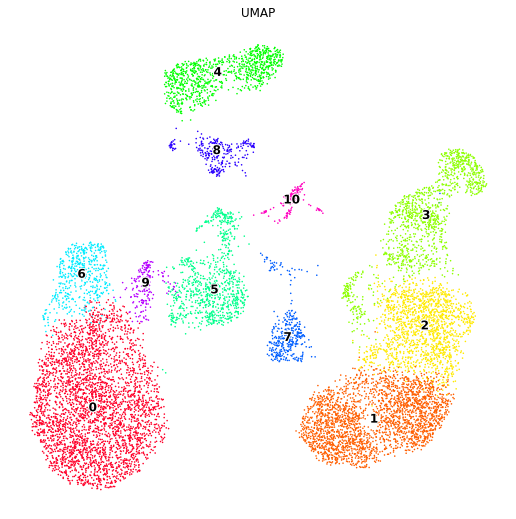

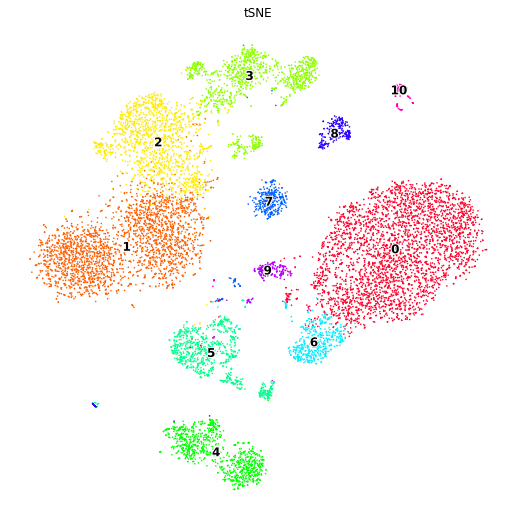

0 : 3416
1 : 2508
2 : 1526
3 : 1243
4 : 941
5 : 894
6 : 502
7 : 364
8 : 276
9 : 197
10 : 145
AnnData object with n_obs × n_vars = 5 × 12012
AnnData object with n_obs × n_vars = 12012 × 5


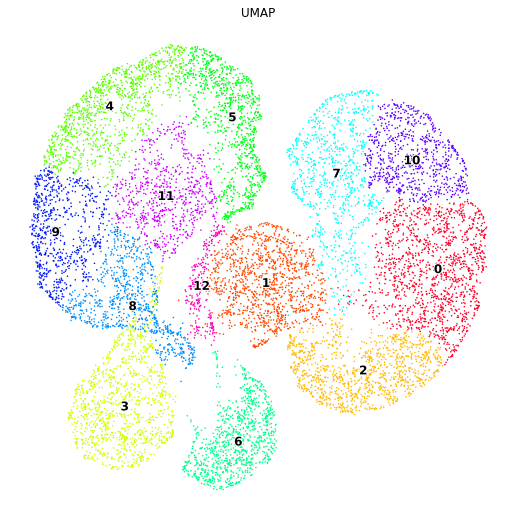

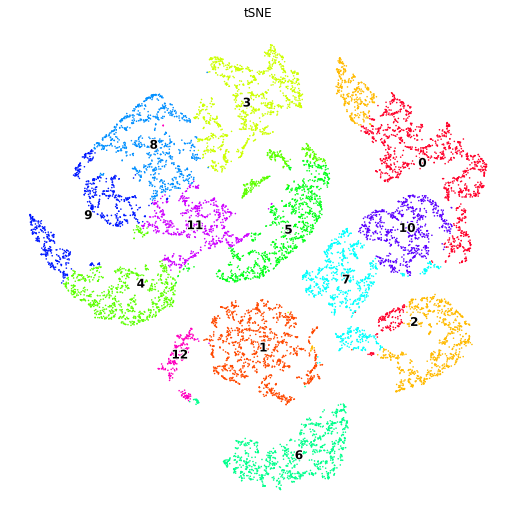

0 : 1345
1 : 1190
2 : 1129
3 : 1124
4 : 1108
5 : 1004
6 : 980
7 : 886
8 : 825
9 : 739
10 : 728
11 : 708
12 : 246


In [4]:
for res1 in [0.3]:
    for res2 in [0.25]:
#         for n_pcs in [0]:
#             for hvg in [True]:


        ############################ High_var = True ######################################
        input_dir = "/home/ejafari/alignment/downstream/data/PBMC_10k/mine/"
        # Find marker genes of scRNAseq data
        markers_rna, rna = scRNAseq_clustering_original(input_dir + 'rna.csv', filtering=True, resl=res1, highly_var=True, tr=True, n_pc=15)

        
        # Find clusters of low dimensional cisTopic result for scATACseq
        atac = clustering(input_dir + 'atac_topics.tsv', transpose=True, resl=res2)


        ############################ scATAC ######################################
        # 1) Put cisTopic clusters and embedding values on the original data and 2) find marker genes and their logFC
        f_original = 'pred_matrix_closest_genes_1k_downstream_strand_first_prom.csv'
        markers_atac, atac_cis_on_org = process_cisTopic_on_orig(atac, f_original, input_dir, save=False, transpose=True)

        # To match name of the cells in RNA and ATAC data
        atac_cis_on_org.obs.index = [i.replace('.','-') for i in atac_cis_on_org.obs.index] 


In [5]:
col_ind = {1: 5, 2: 11, 3: 3, 4: 7, 5: 6, 7: 2, 8: 12}
cats_rna = [int(i) for i in rna.obs['leiden'].cat.categories]
cats_atac = [int(i) for i in atac_cis_on_org.obs['leiden'].cat.categories]

for i in range(8):
    print(rna.uns['leiden_colors'][cats_rna.index(i)], atac.uns['leiden_colors'][cats_atac.index(i)])


#ff0029 #ff0029
#ff5e00 #ff4800
#ffea00 #00ff16
#8dff00 #00ff8c
#00ff00 #00fffd
#00ff8c #008fff
#00ecff #0018ff
#005eff #5a00ff


In [40]:
colors = ["#ff0029", "#ff00bf" , "#ccff00", "#ff0000", "#00ffed", "#0018ff", "#ff9900" , "#A020F0"]

0 0
1 1
4 7
8 11
9 12
10 2
1 #ff9900 #A020F0
2 #ff9900 #ff9900
3 #ff9900 #0018ff
4 #ff9900 #00ffed
5 #ff9900 #ff0000
7 #ff9900 #ccff00
8 #ff9900 #ff00bf


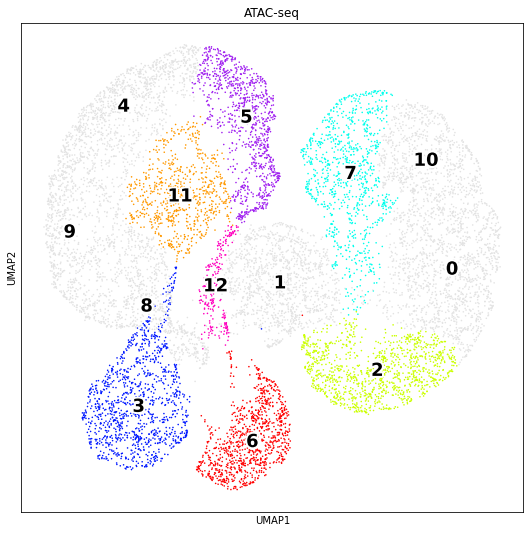

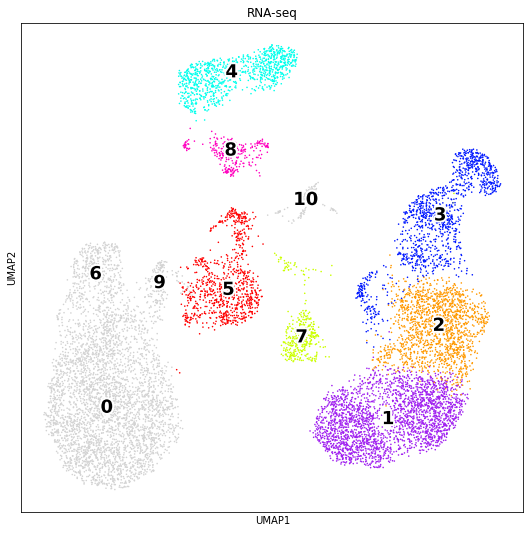

In [41]:
# col_ind = {1: 5, 2: 11, 3: 3, 4: 7, 5: 6, 7: 2, 8: 12}
for cls in range(len(rna.uns['leiden_colors'])):
    if cls not in col_ind.keys():
        rna.uns['leiden_colors'][cats_rna.index(cls)] = '#D3D3D3' # Light grey

atac_cis_on_org.uns['leiden_colors'] = atac.uns['leiden_colors'] 


for cls in range(len(atac_cis_on_org.uns['leiden_colors'])):
    if cls not in col_ind.values():
        atac_cis_on_org.uns['leiden_colors'][cats_atac.index(cls)] = '#E3E3E3' # Light grey
        print(cls, cats_atac.index(cls))
        
for cls_r, cls_a in col_ind.items():
    color = colors.pop()
    print(cls_r, atac_cis_on_org.uns['leiden_colors'][cats_atac.index(cls)], color)
    
    atac_cis_on_org.uns['leiden_colors'][cats_atac.index(cls_a)] = color
    rna.uns['leiden_colors'][cats_rna.index(cls_r)] = color

sc.pl.umap(atac_cis_on_org, color=['leiden'], legend_loc='on data', legend_fontsize=18, legend_fontoutline=4,frameon=True, title='ATAC-seq', save='PBMC_12k_ATAC_grey.svg')#
sc.pl.umap(rna, color=['leiden'], legend_loc='on data', legend_fontsize=18, legend_fontoutline=4,frameon=True, title='RNA-seq', save='PBMC_12_RNA_grey.svg')#

In [17]:
cls_r


1

In [14]:
colors

['#ff0029',
 '#ff9900',
 '#ffff00',
 '#ff00bf',
 '#00ffed',
 '#0018ff',
 '#ff00bf',
 '#A020F0']